# 1. ANÁLISE EXPLORATÓRIA DOS DADOS (EDA)

# 🤖 AI para DEVs - Fase 1 🤖

## 📈 Desafio Machine Learning

Criar um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro saúde.

### 📚 Sobre a base de dados
Contém 1338 linhas com informações sobre a idade da pessoa, gênero, índice de massa corporal (IMC), número de filhos, flag de verificação se a pessoa é fumante, região residencial do benefício e o valor do custo médico. O nome das features (colunas) estão em inglês na base de dados.

### 📖 Dicionário dos dados
- **Idade (age)**: idade do benificiário principal (titular).
- **Gênero (sex)**: gênero do contratante de seguros.
- **IMC (bmi)**: índice de massa corporal, fornecendo uma compreensão do corpo, pesos relativamente altos ou baixos em relação à altura.
- **Filhos (children)**: número de filhos cobertos por seguro saúde / número de dependentes.
- **Fumante (smoker)**: se a pessoa fuma (sim ou não).
- **Região (region)**: a área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste ou noroeste.
- **Encargos (charges)**: custos médicos individuais cobrados pelo seguro saúde.

### ❤ Classificação do IMC (OMS)
**Abaixo do peso**: < 18,5

**Peso normal**: 18,5 – 24,9

**Sobrepeso**: 25,0 – 29,9

**Obesidade Grau I**: 30,0 – 34,9

**Obesidade Grau II**: 35,0 – 39,9

**Obesidade Grau III (Mórbida)**: > 40,0

### Considerando as características do beneficiário, qual o custo médio cobrado?
- Idade influencia no valor?
- Idade/Gênero influenciam no valor?
- IMC influencia no valor?
- O fato da pessoa ser fumante ou não fumante influencia no valor?
- A região de residência influencia no valor?

In [4]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações
np.random.seed(42)
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
print('✅ Bibliotecas importadas e configurações realizadas com sucesso.')

✅ Bibliotecas importadas e configurações realizadas com sucesso.


In [5]:
# Carregar base de dados
df = pd.read_csv('../data/raw/insurance.csv')
print('✅ Base de dados carregada com sucesso.')

✅ Base de dados carregada com sucesso.


In [6]:
# Verficar as primeiras linhas do dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# Verificando as dimensões do dataset
shape = df.shape
print(f"O dataset possui {shape[0]} linhas e {shape[1]} colunas.")

O dataset possui 1338 linhas e 7 colunas.


In [8]:
# Obtendo as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


De acordo com as informações do dataset:
- todas as linhas e colunas estão preenchidas, não existem valores nulos;
- existem 3 colunas do tipo texto, variáveis categóricas (sex, smoker e region) precisamos trata-las e converter para um tipo numérico se necessário;
- a coluna que representa nossa variável resposta (target) é a de encargos (charge);

In [9]:
# Verificando o número total de linhas duplicadas
duplicate_rows = df.duplicated().sum()

if duplicate_rows > 0:
    print(f"O dataset possui {duplicate_rows} linhas duplicadas. No pre processamento vamos excluir")
    print("Exemplos de linhas duplicadas (todas as ocorrências):")
    display(df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()))
else:
    print("O dataset não possui linhas duplicadas.")

O dataset possui 1 linhas duplicadas. No pre processamento vamos excluir
Exemplos de linhas duplicadas (todas as ocorrências):


,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


<Axes: ylabel='Frequency'>

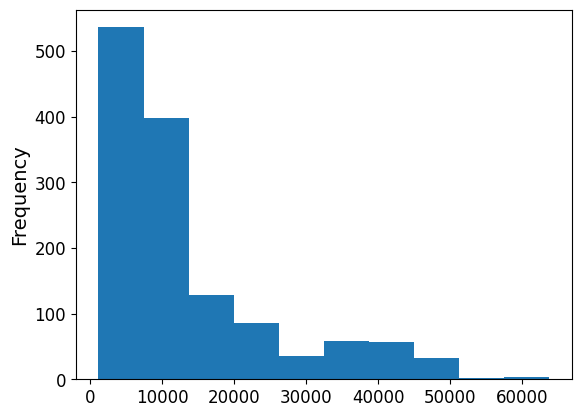

In [10]:
# Analisando a variável de resposta charges
df.charges.plot(kind="hist")

In [11]:
df.charges.describe().astype(str)

count                1338.0
mean     13270.422265141257
std      12110.011236694001
min               1121.8739
25%              4740.28715
50%                9382.033
75%            16639.912515
max             63770.42801
Name: charges, dtype: object

Não há uma distribuição normal na nossa variável de resposta a mediana e a média estão muito afastadas.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

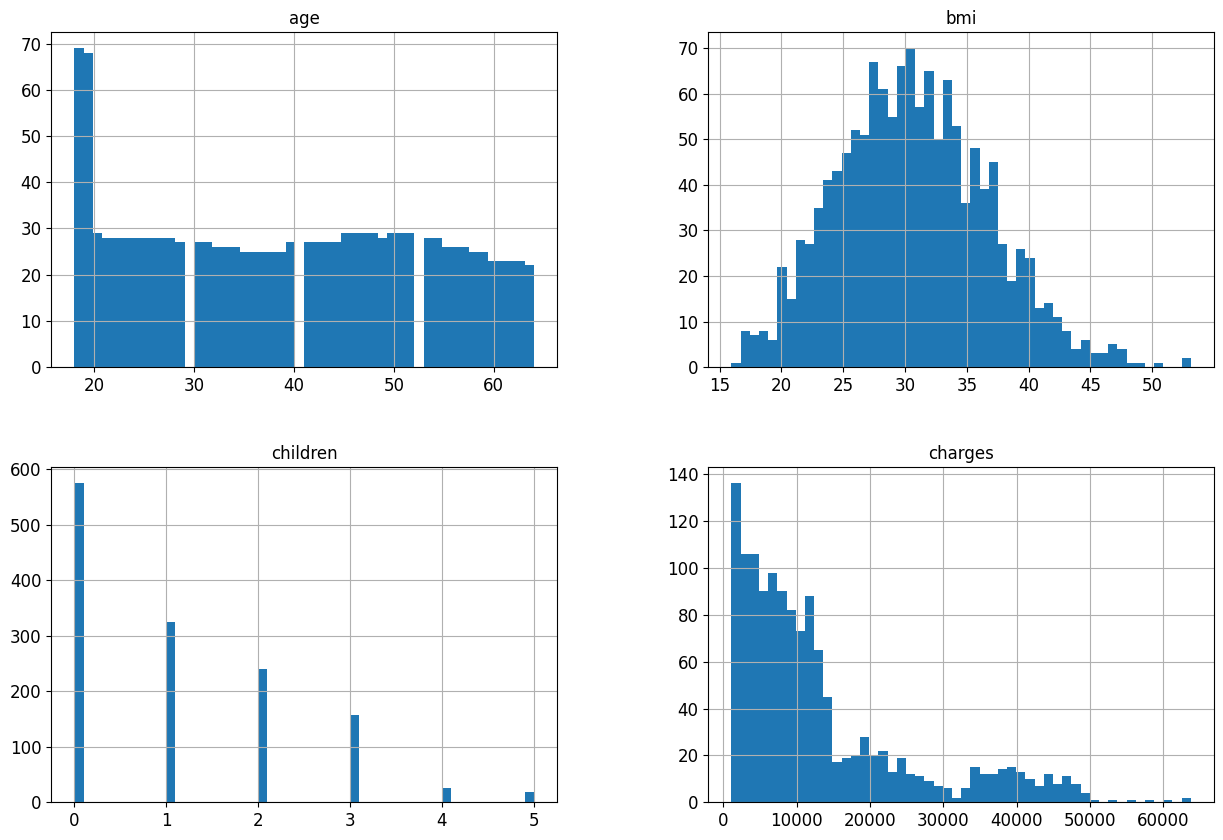

In [12]:
# Analisando a distribuição das variáveis de entrada numéricas + a variável de resposta
df.hist(bins=50, figsize=(15,10))

Observações:
- Bastante assimetria nos dados
- A váriavel mais próxima de uma distribuição normal é bmi (IMC) que representa o indície de massa corporal. Vamos analisar.
- A maioria dos beneficiários não possui filhos
- Os valores de encargos estão concentrados entre ~1000 e ~15000 dolares


<Axes: ylabel='Frequency'>

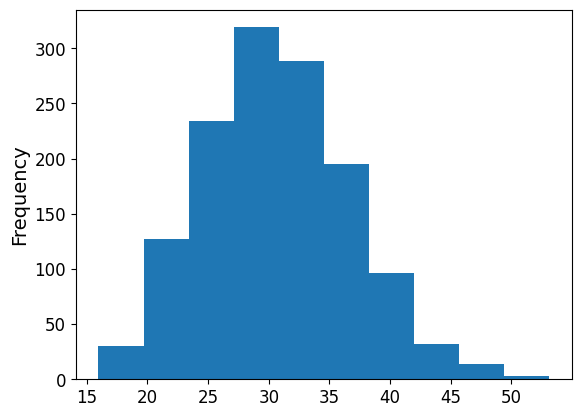

In [13]:
# Histograma da variável bmi (IMC)
df.bmi.plot(kind="hist")

In [14]:
df.bmi.describe().astype(str)

count               1338.0
mean     30.66339686098655
std      6.098186911679014
min                  15.96
25%               26.29625
50%                   30.4
75%               34.69375
max                  53.13
Name: bmi, dtype: object

A média e a mediana estão bem próximas 30.66 e 30.4 respectivamente
O desvio padrão está baixo 6.09.

<Axes: >

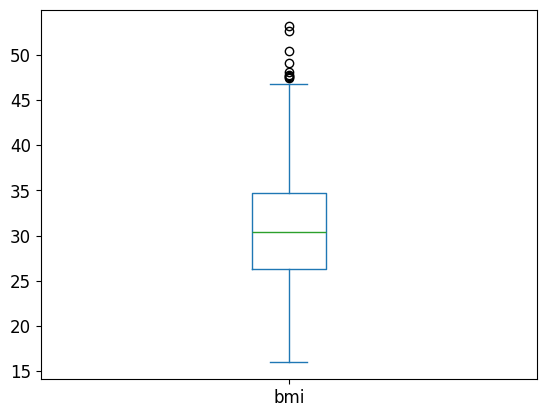

In [15]:
# Buscando outliers na variável bmi (IMC) com Boxplot
df.bmi.plot(kind="box")

Existem outliers, decidir se mantemos ou não na base de dados.

<Axes: xlabel='bmi', ylabel='charges'>

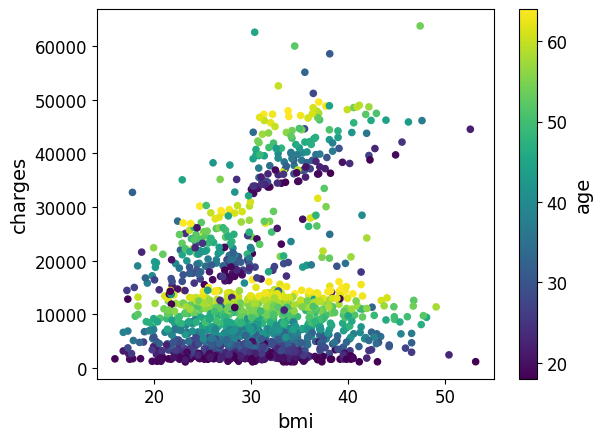

In [16]:
# Analisar a distribuição entre bmi (IMC) x charges (Encargos)
df.plot(kind="scatter", x="bmi", y="charges", c="age", cmap="viridis")

<Axes: >

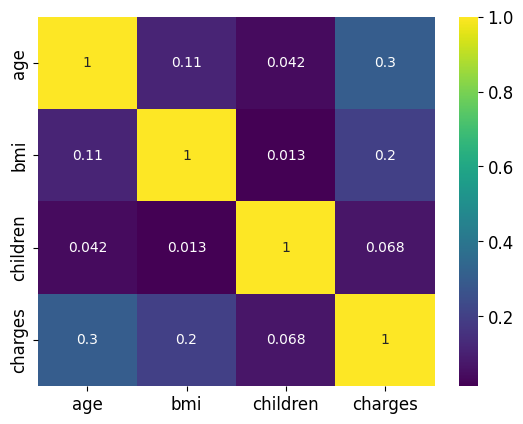

In [17]:
# Analisar as variáveis numéricas para buscar a melhor correlação entre variáveis
numeric_df = df.select_dtypes(include=[np.number])
correlacao = numeric_df.corr()
sns.heatmap(correlacao, annot=True, cmap='viridis')

É possível observar que existe, apesar de baixa, uma correlação de 30% entre as variáveis age (idade) e charges (encargos) e também uma correlação menor ainda, 20%, entre bmi (IMC) e charges (encargos).
Somente estas variáveis numércias não parecem ser boas o suficiente para treintar o modelo. Vamos converter as demais variáveis string (sex, smoker e region) para tipos numéricos e fazer a análise de correlação novamente.

In [18]:
# Analisando as variáveis de texto (sex, smoker e region)
df[['sex', 'smoker', 'region']].value_counts()

sex     smoker  region   
female  no      southwest    141
                southeast    139
                northwest    135
male    no      southeast    134
                northwest    132
female  no      northeast    132
male    no      southwest    126
                northeast    125
        yes     southeast     55
                northeast     38
                southwest     37
female  yes     southeast     36
                northeast     29
                northwest     29
male    yes     northwest     29
female  yes     southwest     21
Name: count, dtype: int64

In [19]:
# Analisando como estão distribuídos os registros de gênero (variável sex).
# Criando um data frame para analisar o percentual de distribuição
sex_counts = df.sex.value_counts()
sex_percentages = df.sex.value_counts(normalize=True) * 100

sex_analysis = pd.DataFrame({
    'Count': sex_counts,
    'Percentage': sex_percentages.round(2)
})

display(sex_analysis)

,Count,Percentage
sex,,
male,676,50.52
female,662,49.48


Parece haver uma boa distribuição entre gêneros feminino e masculino no nosso dataset. Há um bom balanceamento para a variável sex.

In [20]:
# Analisando como estão distribuídos os registros de fumantes e não fumantes (variável smoker)
# Criando um data frame para analisar o percentual de distribuição
smoker_counts = df.smoker.value_counts()
smoker_percentages = df.smoker.value_counts(normalize=True) * 100

smoker_analysis = pd.DataFrame({
    'Count': smoker_counts,
    'Percentage': smoker_percentages.round(2)
})

display(smoker_analysis)

,Count,Percentage
smoker,,
no,1064,79.52
yes,274,20.48


Em nosso dataset existem mais beneficiários que não fumam. ~80% da base é composta por não fumantes, temos que ter ⚠️ cuidado quando separarmos as bases entre Treino e Teste 80/20 para não correr o risco de ter todos os não fumantes na base de treino, enquanto o fumantes ficam na base de teste.

In [21]:
# Analisando as categorias existentes na variável region
set(df['region'])

{'northeast', 'northwest', 'southeast', 'southwest'}

A variável region está dividida em 4 categorias distintas, vamos analisar a quantidade de beneficiários em cada uma dessas regiões

In [22]:
# Analisando como estão distribuídos os registros por região (variável region)
# Criando um data frame para analisar o percentual de distribuição
region_counts = df.region.value_counts()
region_percentages = df.region.value_counts(normalize=True) * 100

region_analysis = pd.DataFrame({
    'Count': region_counts,
    'Percentage': region_percentages.round(2)
})

display(region_analysis)

,Count,Percentage
region,,
southeast,364,27.20
southwest,325,24.29
northwest,325,24.29
northeast,324,24.22


Da mesma forma que a variável sex (gênero) parece que a variável de região (region) tem um bom balanceamento.

Vamos avaliar todas as variáveis numéricas montando uma matriz de dispersão para cada uma fazendo a relação com charges. Vamos montar uma matriz para cada variável categórica:
1. Colorir com sex (gênero)
2. Colorir com smoker (fumante)
3. Colorir com region (região)
Vamos tentar descobrir quem mais influencia no valor dos encargos do seguro.

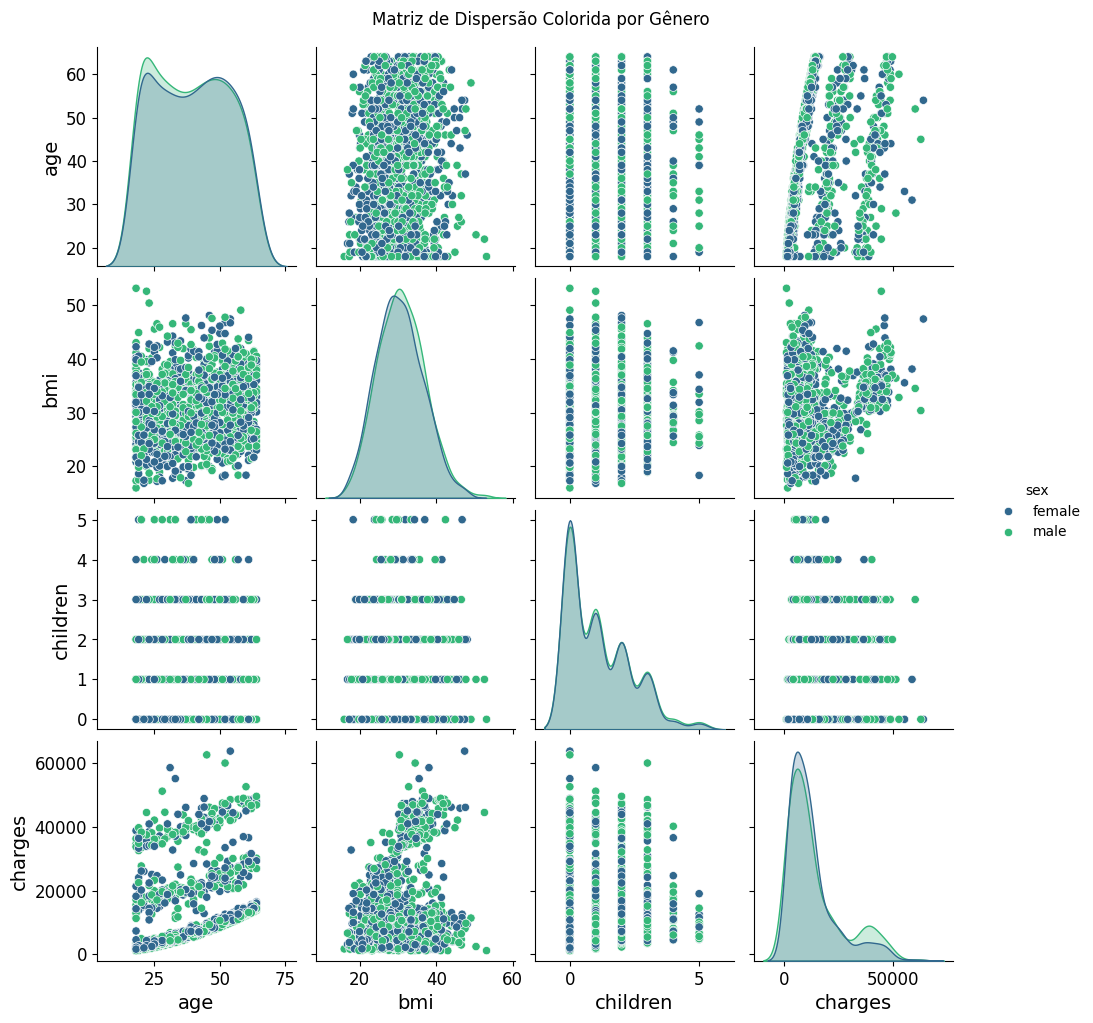

In [23]:
# Matriz de Gráficos de Dispersão com sex (gênero)
# Selecionar apenas as variáveis numéricas e a variável 'sex'
# para o pairplot
columns_for_pairplot = ['age', 'bmi', 'children', 'charges', 'sex']
sns.pairplot(df[columns_for_pairplot], hue='sex', palette='viridis')
plt.suptitle('Matriz de Dispersão Colorida por Gênero', y=1.02)
plt.show()

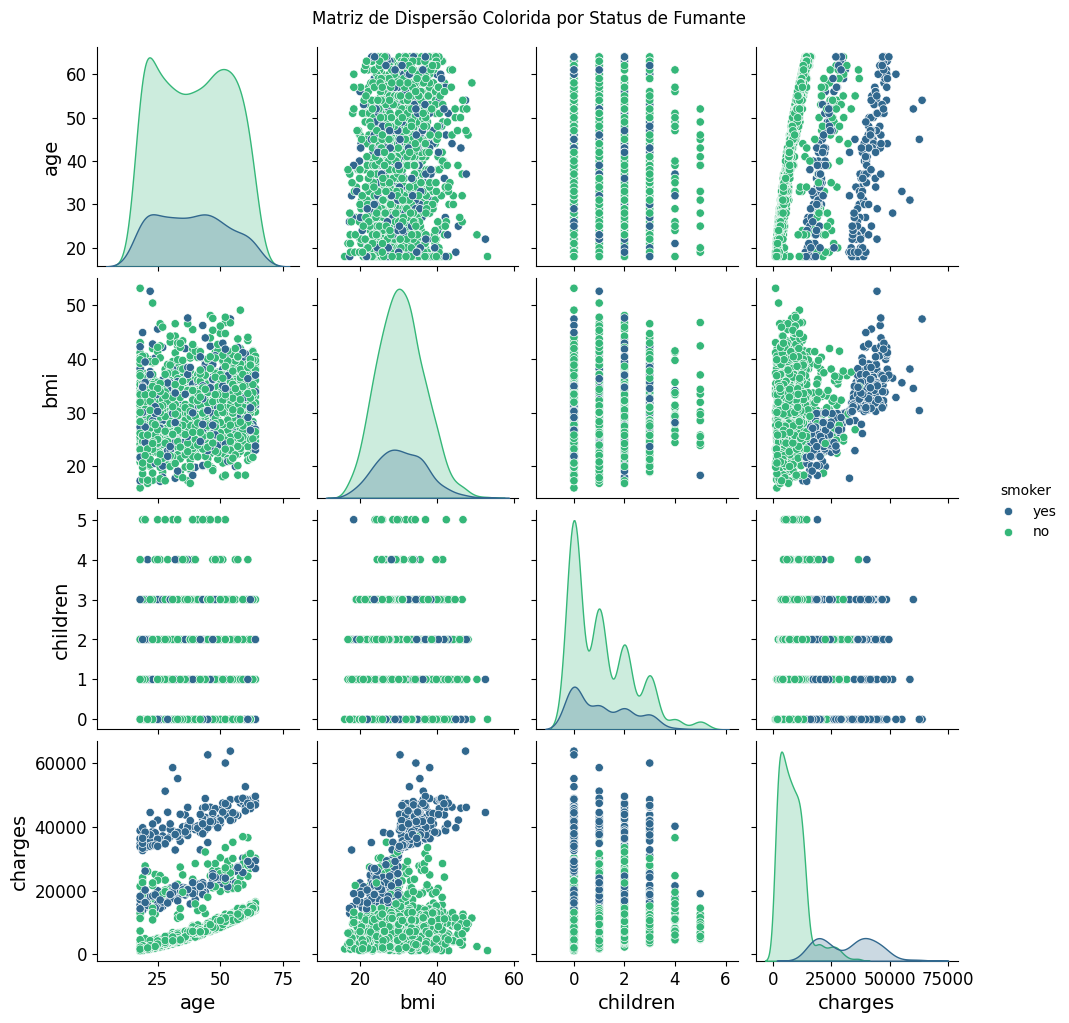

In [24]:
# Matriz de Gráficos de Dispersão com smoker (Fumante)
# Selecionar apenas as variáveis numéricas e a variável 'smoker'
# para o pairplot
columns_for_pairplot = ['age', 'bmi', 'children', 'charges', 'smoker']
sns.pairplot(df[columns_for_pairplot], hue='smoker', palette='viridis')
plt.suptitle('Matriz de Dispersão Colorida por Status de Fumante', y=1.02)
plt.show()

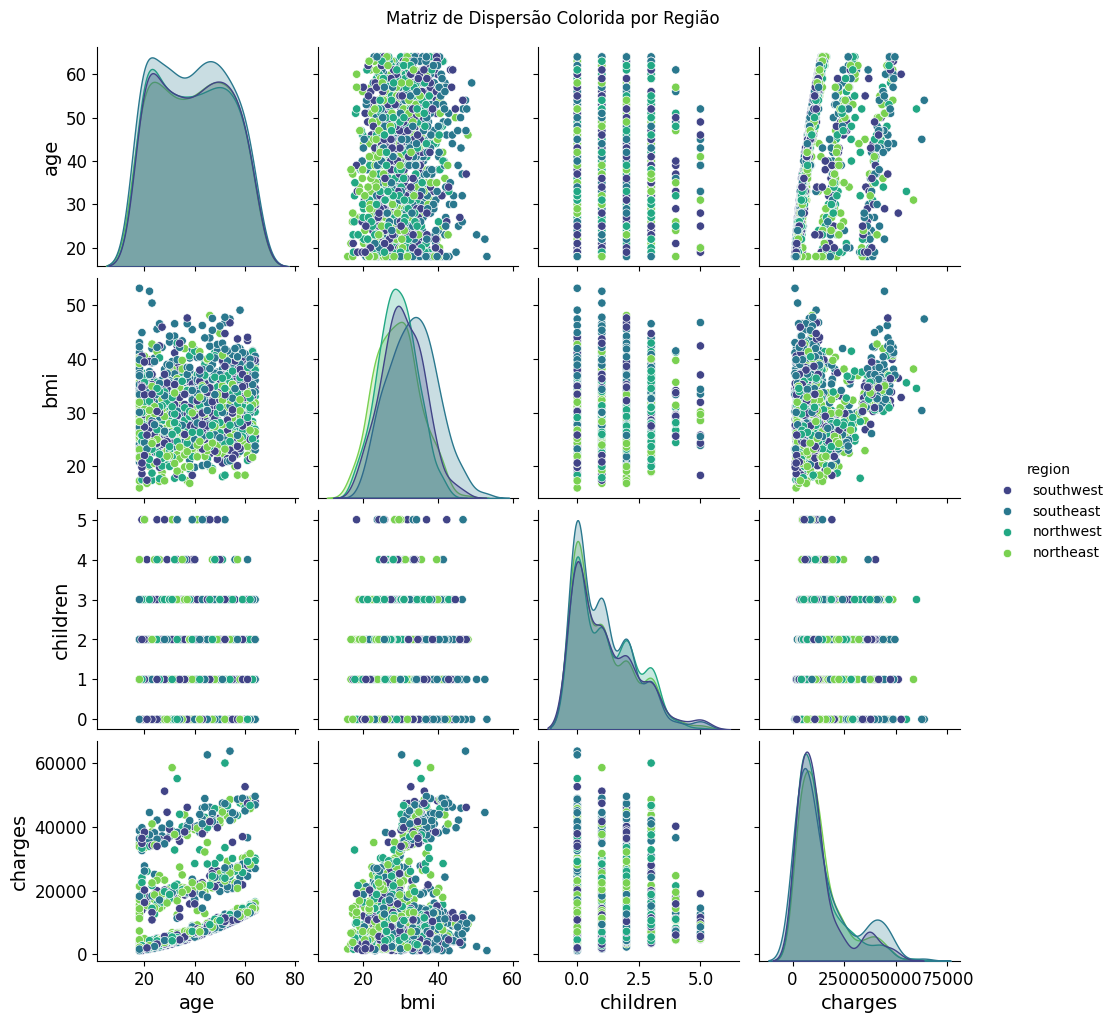

In [25]:
# Matriz de Gráficos de Dispersão com region (região)
# Selecionar apenas as variáveis numéricas e a variável 'region'
# para o pairplot
columns_for_pairplot = ['age', 'bmi', 'children', 'charges', 'region']
sns.pairplot(df[columns_for_pairplot], hue='region', palette='viridis')
plt.suptitle('Matriz de Dispersão Colorida por Região', y=1.02)
plt.show()

### O que pode ser observado nos graficos de dispersão acima
- **age (Idade)**: influencia no valor. Existe uma tendência de aumento de valor com o aumento da idade. Como visto no gráfico de correlação, esse número chega a 30%.
- **ibm (IMC)**: também tem uma correlação positiva com os engargos, mas bem moderada. Pessoas com o IMC mais alto tendem a ter custos ligeiramente maiores, mas não parece ser um preditor tão forte.
- **smoker (Fumante)**: fumantes apresentam encargos mais altos em todas as faixas etárias, parece ser o maior preditor de custos.
- **sex, children e region (Gênero, Filhos e Região)**: não demonstram influências sigificativas nos custos médios.

Em resumo, os gráficos reforçam a importância do status de fumante como principal preditor dos encargos médicos. Vamos agora analisar os outliers do status de fumante para decidirmos se mantemos ou não eles em nosso dataset.

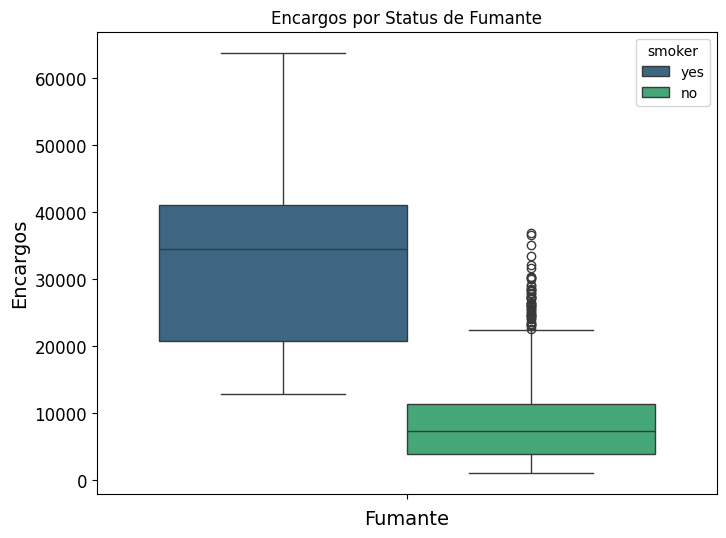

In [26]:
# Analisando os outliers do Status e Fumante
plt.figure(figsize=(8, 6))
sns.boxplot(hue='smoker', y='charges', data=df, palette='viridis')
plt.title('Encargos por Status de Fumante')
plt.xlabel('Fumante')
plt.ylabel('Encargos')
plt.show()

O boxplot confirma a tendência dos fumantes pagarem maiores encargos médicos. Em contra partida, podemos observar alguns outliers com status de não fumantes que pagam encargos acima de 20000 dolares. Estes outliers podem estar relacionados a idade ou ao IMC que vimos anteriormente. Como o dataset é pequeno, vamos optar por mantê-lo na base de dados.

# PRÉ PROCESSAMENTO DO DATASET

- Nosso dataset é pequeno, vamos manter os outliers para o treinamento do modelo.
- Nosso dataset não possui valor nulo e tem uma linha duplicada que precisa ser tratada.
- Existem variáveis categóricas (sex, smoker), vamos usar LabelEncoder para transformar essas variáveis.
- Outra variável categórica é region, ela é nominal e não binária como as anteriores, como possui 4 valores, vamos usar OneHotEncoding
- Apesar de sex e region não serem preditores influentes, vamos mantê-las neste primeiro momento.

## Tarefas
1. Remover a linha duplicada
2. Transformar a variável sex com Label Encoding, onde:
    - 0 = female
    - 1 = male
3. Transformar a variável smoker com Label Encoding, onde:
    - 0 = no
    - 1 = yes
4. Transformar a variável region com OnHotEncoding

In [27]:
# Remover a linha duplicada do dataset
df = df.drop_duplicates()

# Verificando o número total de linhas duplicadas
duplicate_rows = df.duplicated().sum()

if duplicate_rows > 0:
    print(f"O dataset possui {duplicate_rows} linhas duplicadas. No pre processamento vamos excluir")
    print("Exemplos de linhas duplicadas (todas as ocorrências):")
    display(df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()))
else:
    print("O dataset não possui linhas duplicadas.")

O dataset não possui linhas duplicadas.


In [28]:
# Após a remoção da linha duplicada vamos rdefinir os indices do dataframe
df.reset_index(drop=True, inplace=True)
df.shape

(1337, 7)

In [29]:
# Transformar as variáveis sex e smoker com Label Encoding, onde:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
df['sex'] = le_sex.fit_transform(df['sex'])
df['smoker'] = le_smoker.fit_transform(df['smoker'])

C:\Users\rodri\AppData\Local\Temp\ipykernel_4228\2028733272.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = le_sex.fit_transform(df['sex'])
C:\Users\rodri\AppData\Local\Temp\ipykernel_4228\2028733272.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoker'] = le_smoker.fit_transform(df['smoker'])


In [30]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.2+ KB


In [32]:
df.sex.value_counts()

sex
1    675
0    662
Name: count, dtype: int64

In [33]:
df.smoker.value_counts()

smoker
0    1063
1     274
Name: count, dtype: int64

In [34]:
print('Classes de sex: ', le_sex.classes_)
print('Classes de smoker: ', le_smoker.classes_)

Classes de sex:  ['female' 'male']
Classes de smoker:  ['no' 'yes']


In [35]:
# Transformando a variável region com OneHotEncoding, utilizando a função get_dummies() do Pandas
df = pd.get_dummies(df)

# Seleciona apenas as colunas do tipo bool
cols_bool = df.select_dtypes(include=['bool']).columns

# Aplica a conversão apenas nessas colunas
df[cols_bool] = df[cols_bool].astype('int64')

In [36]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   sex               1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   smoker            1337 non-null   int64  
 5   charges           1337 non-null   float64
 6   region_northeast  1337 non-null   int64  
 7   region_northwest  1337 non-null   int64  
 8   region_southeast  1337 non-null   int64  
 9   region_southwest  1337 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 104.6 KB


In [38]:
df.shape

(1337, 10)

<Axes: >

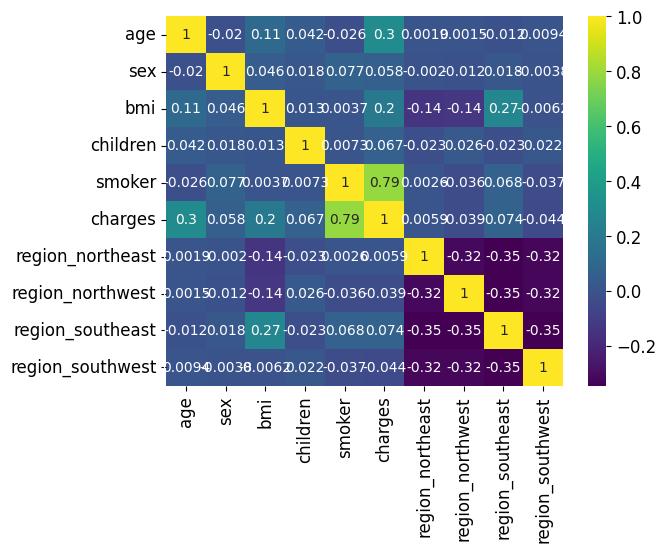

In [39]:
# Após o tratamento das variáveis, vamos fazer uma nova correlação para ver se confirmamos a importância do statu de fumante
numeric_df = df.select_dtypes(include=[np.number])
correlacao = numeric_df.corr()
sns.heatmap(correlacao, annot=True, cmap='viridis')

Coforme apontado na análise dos gráficos de matriz de distribuição, a variável smoker tem ~80% de correlação com os encargos.
Outro informação que fica muito evidente é a importancia dos dados de região, confirmamos que não tem relevência preditiva. Vamos criar nosso dataset final excluindo as colunas de região e manter as demais.


In [40]:
# Criando o dataset final sem as variáveis de região
df_final = df.drop(['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'], axis=1)
df_final.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


<Axes: >

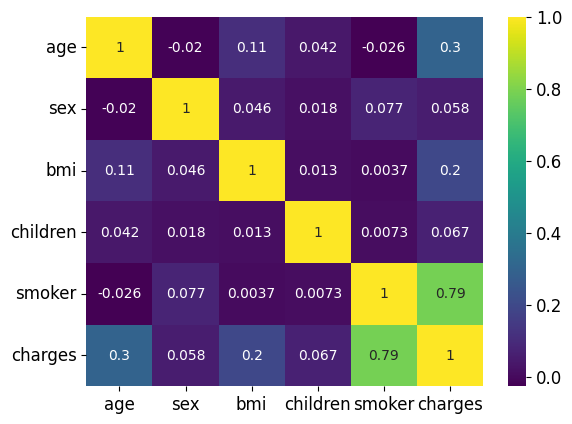

In [41]:
# Vamos analisar novamente a correlação com o dataset final
numeric_df_final = df_final.select_dtypes(include=[np.number])
correlacao = numeric_df_final.corr()
sns.heatmap(correlacao, annot=True, cmap='viridis')

Vemos que gênero e filhos tem baixíssima correlação, mas como são poucas variáveis no dataset, vamos mantê-los

#2. TREINAMENTO DOS MODELOS

Treinar os modelos usando os seguintes algoritmos de regressão. Como o dataset não foi normalizado com StandardScaler ou MinMaxScaler, optamos por usar os algoritmos abaixo que não exitem escalonamento.

1. Regressão Linear (LinearRegreesion)
2. Floresta Aleatória para Regressão (RandomForestRegressor)
3. Árvore de Decisão para Regressão (DecisionTreeRegressor)
4. Gradient Boosting (XGBoost nativo do Sklearn)

In [42]:
# Preparando os dados para o treinamento e teste
X = df_final.drop('charges', axis=1)
y = df_final.charges

## ⚠️ Ponto de Atenção para divisão do treino e teste
Como vimos na análise, em nossa base temos ~80% de não fumantes, isto pode ser um problema, pois corremos o risco da base de treino ficar com
todos os não fumantes e a base de teste com todos os fumantes, já que vamos fazer a divisão 80/20. Para garantir a representatividade, vamos usar amostragem estratificada, o Sampling.

In [43]:
# Dividir o dataset final em dados de treino e teste
from sklearn.model_selection import train_test_split
# Dividindo a base usando stratify para a variável smoker
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['smoker'])

In [44]:
# Criando um data frame para analisar o percentual de distribuição de smoker
# nos dados de treino
smoker_counts = X_train.smoker.value_counts()
smoker_percentages = X_train.smoker.value_counts(normalize=True) * 100

smoker_analysis = pd.DataFrame({
    'Count': smoker_counts,
    'Percentage': smoker_percentages.round(2)
})

display(smoker_analysis)
#

,Count,Percentage
smoker,,
0,850,79.51
1,219,20.49


In [45]:
# Criando um data frame para analisar o percentual de distribuição de smoker
# nos dados de teste
smoker_counts = X_test.smoker.value_counts()
smoker_percentages = X_test.smoker.value_counts(normalize=True) * 100

smoker_analysis = pd.DataFrame({
    'Count': smoker_counts,
    'Percentage': smoker_percentages.round(2)
})

display(smoker_analysis)
#

,Count,Percentage
smoker,,
0,213,79.48
1,55,20.52


Analisando os dados de treino e teste a quantidade de fumantes e não fumantes mateve as proporções do dataframe original

In [46]:
# 1º Treino - Regressão Linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

modelo_regressao_linear = LinearRegression()
modelo_regressao_linear.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
X_train.head(1)

,age,sex,bmi,children,smoker
367,42,0,24.985,2,0


In [48]:
age = 42
sex = 0
bmi = 24.985
children = 2
smoker = 0
teste = [[age, sex, bmi, children, smoker]]
modelo_regressao_linear.predict(teste)

c:\Users\rodri\workspaces\workspace-machine-learning\health-insurance-cost-predictor-model\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8148.67021231])

In [49]:
y_train.head(1)

367    8017.06115
Name: charges, dtype: float64

In [50]:
# 2º Treino - Floresta Aleatória para Regressão
from sklearn.ensemble import RandomForestRegressor

modelo_floresta_aleatoria = RandomForestRegressor()
modelo_floresta_aleatoria.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [51]:
# 3º Treino - Árvore de Decisão para Regressão
from sklearn.tree import DecisionTreeRegressor

modelo_arvore_decisao = DecisionTreeRegressor()
modelo_arvore_decisao.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [52]:
# 4º Treino - Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

modelo_gradient_boosting = GradientBoostingRegressor()
modelo_gradient_boosting.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


#3. AVALIAÇÃO DOS MODELOS
Fazer a predição dos modelos e avaliar as métricas

In [53]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [54]:
# Faz as predições para cada modelo
predicao_regressao_linear = modelo_regressao_linear.predict(X_test)
predicao_floresta_aleatoria = modelo_floresta_aleatoria.predict(X_test)
predicao_arvore_decisao = modelo_arvore_decisao.predict(X_test)
predicao_gradient_boosting = modelo_gradient_boosting.predict(X_test)

In [55]:
# Avaliando os modelos e gerando um dataframe com os resultados para comparação
pd.set_option('display.float_format', lambda x: '%.3f' % x)

modelos = ['Regressão Linear', 'Floresta Aleatória', 'Árvore de Decisão', 'Gradient Boosting']
predicoes = [predicao_regressao_linear, predicao_floresta_aleatoria, predicao_arvore_decisao, predicao_gradient_boosting]

lista_metricas = []

for modelo, predicao in zip(modelos, predicoes):
    # Calculando as métricas
    r2 = r2_score(y_test, predicao)
    mae = mean_absolute_error(y_test, predicao)
    mse = mean_squared_error(y_test, predicao)
    mape = mean_absolute_percentage_error(y_test, predicao)

    # Adicionando as linhas
    lista_metricas.append({
        'Modelo': modelo,
        'R2 Score': r2,
        'MAE': mae,
        'MSE': mse,
        'MAPE': mape})

df_metricas = pd.DataFrame(lista_metricas)

# Monta a tabela destacando os melhores valores
df_metricas.style.highlight_max(subset=['R2 Score'], color='green') \
                   .highlight_min(subset=['MAE', 'MSE', 'MAPE'], color='green') \
                   .format("{:.4f}", subset=['R2 Score', 'MAE', 'MSE', 'MAPE'])

,Modelo,R2 Score,MAE,MSE,MAPE
0,Regressão Linear,0.8206,3619.1111,25861263.3415,0.3605
1,Floresta Aleatória,0.8808,2496.5706,17183823.0660,0.3748
2,Árvore de Decisão,0.7254,2985.7716,39588153.4354,0.4356
3,Gradient Boosting,0.9162,2153.2231,12078411.0383,0.2952


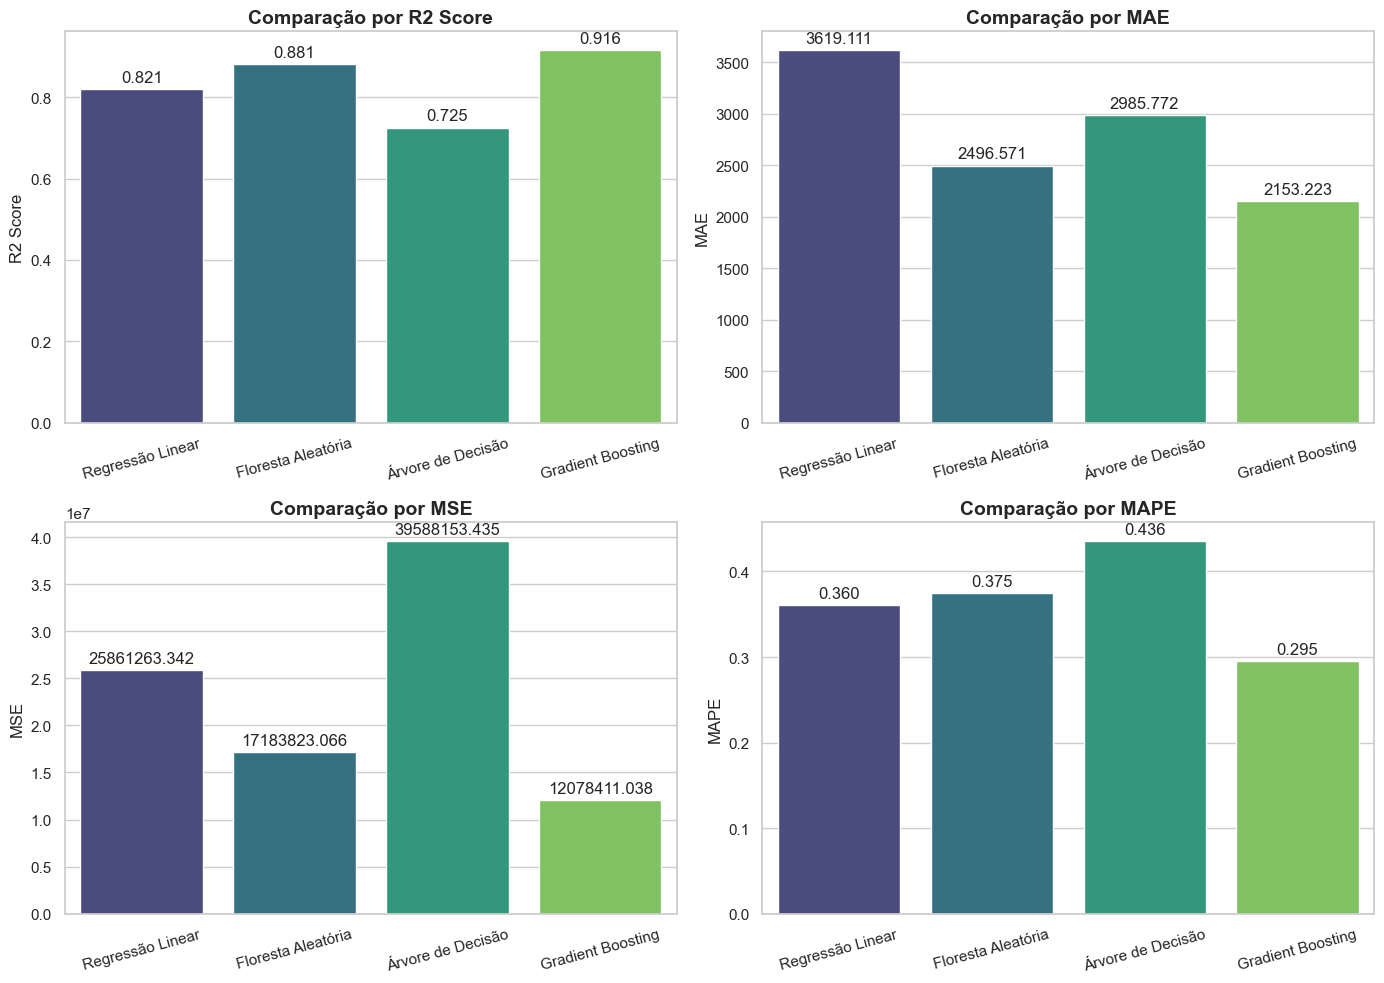

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 10))

# Lista das métricas que queremos visualizar
metricas_para_plotar = ['R2 Score', 'MAE', 'MSE', 'MAPE']

# Criação dos subplots (2 linhas, 2 colunas)
for i, metrica in enumerate(metricas_para_plotar):
    plt.subplot(2, 2, i + 1)

    # Criando o gráfico de barras
    ax = sns.barplot(x='Modelo', y=metrica, data=df_metricas, palette='viridis', hue='Modelo', legend=False)

    # Títulos e rótulos
    plt.title(f'Comparação por {metrica}', fontsize=14, fontweight='bold')
    plt.ylabel(metrica)
    plt.xlabel('')
    plt.xticks(rotation=15) # Rotaciona os nomes para não encavalar

    # Adicionando os valores em cima das barras para facilitar a leitura
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=3)

plt.tight_layout()
plt.show()

### **R2 Score (quanto maior, melhor)**
>Gradient Boosting tem 91%. Ou seja alcançou uma maior explicabilidade dos dados

### **MAE (quanto menor, melhor). Erro para cima ou para baixo**
>Gradient Boosting errou em média 2.153,22 dólares no valor dos encargos

### **MSE (quanto menor, melhor)**
>Gradient Boosting apresenta um valor menor de erro quadrático se comparado aos outros modelos

### **MAPE (quanto menor, melhor). Percentual do erro absoluto**
>Gradient Boosting apresenta um percentual médio de 29,5% de erros

##Podemos então concluir que dos 4 modelos treinados o com melhor desempenho é o Gradient Boosting.



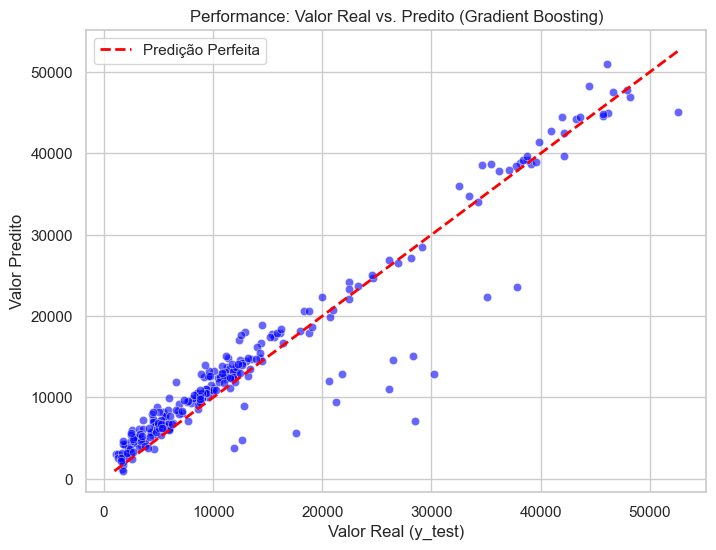

In [57]:
# Para finalizar vamos plotar apenas o melhor modelo (ex: Gradient Boosting) vs o Real
plt.figure(figsize=(8, 6))

# Dados reais vs Predição (exemplo usando o último modelo do loop)
melhor_predicao = predicao_gradient_boosting

sns.scatterplot(x=y_test, y=melhor_predicao, alpha=0.6, color='blue')

# Linha de identidade (onde o valor real seria igual ao predito)
# Pega os limites min e max dos dados para traçar a linha vermelha
m_min = min(y_test.min(), melhor_predicao.min())
m_max = max(y_test.max(), melhor_predicao.max())
plt.plot([m_min, m_max], [m_min, m_max], color='red', linestyle='--', linewidth=2, label='Predição Perfeita')

plt.title('Performance: Valor Real vs. Predito (Gradient Boosting)')
plt.xlabel('Valor Real (y_test)')
plt.ylabel('Valor Predito')
plt.legend()
plt.show()